In [1]:
import numpy as np
import pandas as pd
import random

$$
\phi = -k\frac{\Delta(T)}{dx}  [W/m²]
$$

$\phi$ = heat flux  [W/m²]  
k = thermal conductivity  [W/m*k]  
$\Delta(T)$ = T2 - T1 where $T2 < T1$ [K]  
dx = thickness of the material where the flux will flow [m]  


$$
\phi = -kA\frac{\Delta(T)}{dx}  [W]
$$

$\phi$ = heat transfer rate  [W]  
A = area [m²]  
k = thermal conductivity  [W/m*k]  
$\Delta(T)$ = T2 - T1 where $T2 < T1$ [K]  
dx = thickness of the material where the flux will flow [m]  

In [2]:
#we are going to create a class named contas, which will have the attributes that will be used in the equation
class contas:
    #the atributes are, conductivity, heat_flux, heat_transfer, dt, dx and area
    def __init__(self,heat_transfer,heat_flux,conductivity, dt, dx, area):
        self.conductivity = conductivity
        self.heat_flux = heat_flux
        self.heat_transfer = heat_transfer
        self.dt = dt
        self.dx = dx
        self.area = area
    
    #the method will have different equations, which will be used to calculate different things
    
    #the first equation is the case where we have the conductivity,area, dt and dx, and we want to calculate the heat transfer
    def find_heat_transfer(self):
        #we multiply by -1 because the term dt/dx is negative, given that the temperature flows from the higher temp to the lower temp
        if(self.heat_flux * self.area == 0):
            self.heat_transfer = -1 * self.conductivity*self.area*(self.dt/self.dx)
        else:
            self.heat_transfer = self.heat_flux * self.area
        return self.heat_transfer
    #the second equation is when we are going to calculate the heat flux, which is basically the heat transfer divided by the area
    def find_heat_flux(self):
        if(self.heat_transfer/self.area == 0):
            #if the heat trasnsfer is zero, probably it was not calculated, so we are going to use the equation to calculate the heat flux
            self.heat_flux = -1*self.conductivity*(self.dt/self.dx)
        else:
            self.heat_flux = self.heat_transfer/self.area
        return self.heat_flux
    def find_conductivity(self):
        try:
            self.conductivity = -1*self.heat_transfer*self.dx/(self.area*self.dt)
        except:
            self.conductivity = -1*self.heat_flux*self.dx/(self.dt)
        return self.conductivity
    def find_area(self):
        try:
            self.area = -1*self.heat_transfer*self.dx/(self.conductivity*self.dt)
        except:
            self.area = self.heat_transfer/self.heat_flux #since heat_flux = heat_transfer/area
        return self.area
    def find_dt(self):
        try:
            self.dt = -1*self.heat_transfer*self.dx/(self.conductivity*self.area)
        except:
            self.dt = -1*self.heat_flux*self.dx/(self.conductivity)
        return self.dt
    def find_dx(self):
        try:
            self.dx = -1* self.conductivity*self.area*(self.dt/self.heat_transfer)
        except:
            self.dx = -1*self.conductivity*(self.dt/self.heat_flux)
        return self.dx    

In [3]:
def choice1(arr):
    #in this case, we want to calculate the heat transfer, so we can calculate the heat flux as well, since they are related
    #but first we need to generate the values for conductivity, area, dt and dx
    #conductivity is in w/mk, in nature it ranges from 0.1 to 400
    conductivity = random.uniform(0.1,400)
    #area is in m^2, since we are going to use a plate, it can be from 0.01 to 1
    area = random.uniform(0.1,1)
    #dt is in kelvin, we are going to use a range from -2000 to 0, given that the temperature goes from the higher to lower, hence negative
    dt = random.uniform(-500,0)
    #dx is the thickness in m, we are going to use a range from 0.01 to 1 
    dx = random.uniform(0.1,1)
    #now we are going to create an object of the class contas, which will have the values generated
    conta = contas(0,0,conductivity,dt,dx,area)
    #now we are going to calculate the heat transfer
    heat_transfer = conta.find_heat_transfer()
    #now we are going to calculate the heat flux
    heat_flux = conta.find_heat_flux()
    #now we are going to append the values to the array
    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)
    return arr
    

In [4]:
def choice2(arr):
    #we want to calculate the heat_flux, so we have to generate everything except the heat_flux and the heat_transfer
    #conductivity is in w/mk, in nature it ranges from 0.1 to 400
    conductivity = random.uniform(0.1,400)
    #area is in m^2, since we are going to use a plate, it can be from 0.01 to 1
    area = random.uniform(0.1,1)
    #dt is in kelvin, we are going to use a range from -2000 to 0, given that the temperature goes from the higher to lower, hence negative
    dt = random.uniform(-500,0)
    #dx is the thickness in m, we are going to use a range from 0.01 to 1
    dx = random.uniform(0.1,1)
    #now we are going to create an object of the class contas, which will have the values generated
    conta = contas(0,0,conductivity,dt,dx,area)
    #now we are going to calculate the heat flux
    heat_flux = conta.find_heat_flux()
    #now we are going to append the values to the array
    heat_transfer = conta.find_heat_transfer()
    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)
    return arr

In [5]:
def choice3(arr):
    #we want to calculate the conductivity, so we have to generate everything except the conductivity and heat_flux
    area = random.uniform(0.1,1) #m^2

    dx = random.uniform(0.1,1)

    dt = random.uniform(-500,0) #k

    heat_transfer = random.uniform(0,3000) #w

    conta = contas(heat_transfer,0,0,dt,dx,area)

    conductivity = conta.find_conductivity()

    heat_flux = conta.find_heat_flux()

    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)

    return arr

In [6]:
def choice4(arr):
    #we need to calculate the area, so we have to generate everything except the area and the heat_flux
    conductivity = random.uniform(0.1,400) #w/mk

    dx = random.uniform(0.1,1)

    dt = random.uniform(-500,0) #k

    heat_transfer = random.uniform(0,3000) #w

    conta = contas(heat_transfer,0,conductivity,dt,dx,0)

    area = conta.find_area()

    heat_flux = conta.find_heat_flux()

    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)

    return arr

In [7]:
def choice5(arr):
    #we want to find dt, so we have to generate everything except the dt and the heat_flux
    conductivity = random.uniform(0.1,400) #w/mk

    dx = random.uniform(0.1,1)

    area = random.uniform(0.1,1) #m^2

    heat_transfer = random.uniform(0,3000) #w

    conta = contas(heat_transfer,0,conductivity,0,dx,area)

    dt = conta.find_dt()

    heat_flux = conta.find_heat_flux()

    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)

    return arr

In [8]:
def choice6(arr):
    #we want to find dx, so we have to generate everything except the dx and the heat_flux
    conductivity = random.uniform(0.1,400) #w/mk

    area = random.uniform(0.1,1) #m^2

    dt = random.uniform(-500,0) #k

    heat_transfer = random.uniform(0,3000) #w

    conta = contas(heat_transfer,0,conductivity,dt,0,area)

    dx = conta.find_dx()

    heat_flux = conta.find_heat_flux()

    arr = np.append(arr,[[conductivity,area,dt,dx,heat_transfer,heat_flux]],axis=0)

    return arr

In [9]:
def generate_data(qtt):
    arr = np.array([[0,0,0,0,0,0]])
    #we are randonmly going to choose between 1 and 6, if its 1 we are going to use the first equation and so on
    #since the first equation needs others values, we are going to generate them randomly
    #the values depend on each variable, given that they are physical variables

    #randomly choosing between 1 and 6
    for i in range(qtt):
        choice = random.randint(1,6)
        if choice == 1:
            arr = choice1(arr)
        elif choice == 2:
            arr = choice2(arr)
        elif choice == 3:
            arr = choice3(arr)
        elif choice == 4:
            arr = choice4(arr)
        elif choice == 5:
            arr = choice5(arr)
        elif choice == 6:
            arr = choice6(arr)
        
    df = pd.DataFrame(arr, columns = ['conductivity','area','dt','dx','heat_transfer','heat_flux'])
    df.drop(df.index[0], inplace=True)

    return df

In [10]:
qtd_conductivity_incorrect = 0
qtd_area_incorrect = 0
qtd_dt_incorrect = 0
qtd_dx_incorrect = 0
qtd_heat_transfer_incorrect = 0
qtd_heat_flux_incorrect = 0

df = generate_data(25000)

for i in range(len(df)):
    conductivity = df.iloc[i]["conductivity"]
    area = df.iloc[i]["area"]
    dt = df.iloc[i]["dt"]
    dx = df.iloc[i]["dx"]
    heat_transfer = df.iloc[i]["heat_transfer"]
    heat_flux = df.iloc[i]["heat_flux"]

    conta = contas(heat_transfer,heat_flux,conductivity,dt,dx,area)

    calc_conduct = round(conta.find_conductivity(),3) 
    calc_area = round(conta.find_area(),3)
    calc_dt = round(conta.find_dt(),3)
    calc_dx = round(conta.find_dx(),3)
    calc_heat_transfer = round(conta.find_heat_transfer(),3)
    calc_heat_flux = round(conta.find_heat_flux(),3)

    conduct_value = round(conductivity,3)
    area_value = round(area,3)
    dt_value = round(dt,3)
    dx_value = round(dx,3)
    heat_transfer_value = round(heat_transfer,3)
    heat_flux_value = round(heat_flux,3)


    if(conduct_value != calc_conduct):
        qtd_conductivity_incorrect += 1
    if(area_value != calc_area):
        qtd_area_incorrect += 1
    if(dt_value != calc_dt):
        qtd_dt_incorrect += 1
    if(dx_value != calc_dx):
        qtd_dx_incorrect += 1
    if(heat_transfer_value != calc_heat_transfer):
        qtd_heat_transfer_incorrect += 1
    if(heat_flux_value != calc_heat_flux):
        qtd_heat_flux_incorrect += 1


print("qtd_conductivity_incorrect: ",qtd_conductivity_incorrect)
print("qtd_area_incorrect: ",qtd_area_incorrect)
print("qtd_dt_incorrect: ",qtd_dt_incorrect)
print("qtd_dx_incorrect: ",qtd_dx_incorrect)
print("qtd_heat_transfer_incorrect: ",qtd_heat_transfer_incorrect)
print("qtd_heat_flux_incorrect: ",qtd_heat_flux_incorrect)

qtd_conductivity_incorrect:  0
qtd_area_incorrect:  0
qtd_dt_incorrect:  0
qtd_dx_incorrect:  0
qtd_heat_transfer_incorrect:  0
qtd_heat_flux_incorrect:  0


In [11]:
#dataset = pd.read_csv('data.csv')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

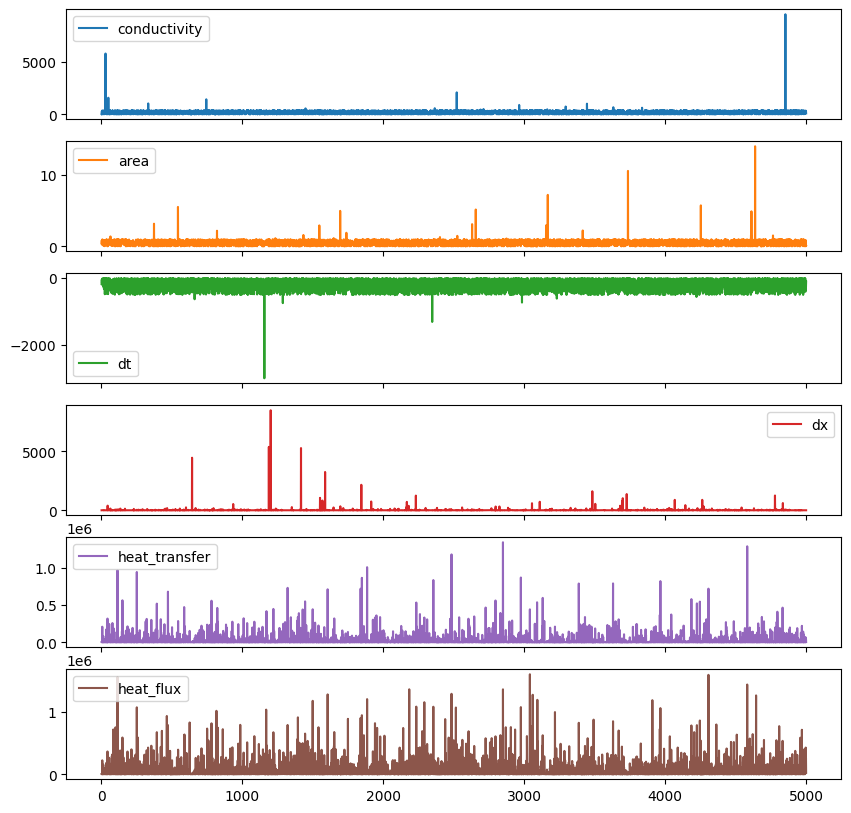

In [12]:
df.plot(subplots=True, figsize=(10,10))

In [13]:
#removing the outliers
df = df[df['heat_transfer'] < 25000]
df = df[df['conductivity'] < 500]
df = df[df['area'] < 5]
df = df[df['dx'] < 1.5]
df = df[df['dt'] > -500]
#checking the amount of data afeter removing the outliers
print(len(df))

3276


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

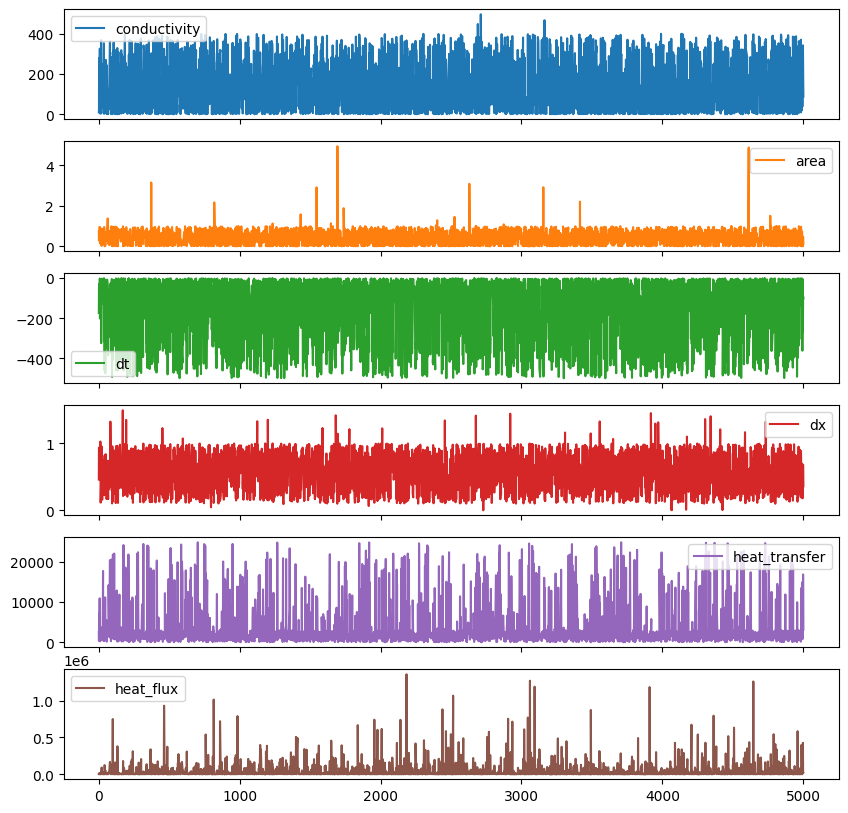

In [14]:
#plotting the graph again after removing the outliers
df.plot(subplots=True, figsize=(10,10))

In [15]:
df.to_csv('data.csv', index=False)